# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 2</p>
## <p style="text-align: center;">Total points: **60**</p>
## <p style="text-align: center;">Due: Monday, **Sep 27** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 


**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Rushiil Deshmukh

EID: rsd949

Name: Troy Richard

EID: tdr944

# Question 1: Bias-Variance (5 pts)

a) (**2 pts**) Assume there is a data generator $Y=f(X)+\epsilon$, which is generating Data(X, Y), where $\epsilon$ is the added random gaussian noise. We are trying to fit a curve to the samples generated from the data generator, using an estimator. The estimator can be represented as $g(X|\theta)$, where $\theta$ represents the parameters. For any test point $x_0$, what does the following mathematical representation mean? Is this the bias or variance of the estimator? $$E[g(x_0)]-f(x_0)$$

b) (**3 pts**) Use your own words to describe why there is a tradeoff between bias and variance. 

## Answer:

Part a:

The mathematical representation measures the distance of the estimator from the data points that are being estimated. The representation is the bias of the estimator for this specific point, and it is the difference of the expected value of the estimator at a specific point and the actual value of the same specific point.


Part b:

There is a tradeoff between bias and variance considering that the more complicated a model is, the more sensitive it is to variation in data. The more complex a model is, the more variance there will be, and the less bias there will be. An estimator's error rate is also dependent on this bias-variance tradeoff. A high error rate will result from high bias and low variance (since the model cannot to the data in a sample) or vice versa (since the model relies too heavily on the seen samples and isn't able to be applied to the entire dataset).

# Question 2: Bias-Variance exploration (20 pts)

We want to build a model that can predict y for unknown inputs x.

(a) (**10 pts**) Fit polynomial models of degrees 2, 4, 7 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled. **Tips**: you can use `np.vander(np.squeeze(x_train), deg+1)` to generate the `deg`-degree polynomial vector of `x_train`. For example, `np.vander(np.squeeze(x_train), 3)` gives you the second-degree polynomial of `x_train`.


(b) (**5 pts**) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

(c) (**5 pts**) Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a **single** plot of the $log(MSE)$ for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them.
**You can use the following codes to load the dataset and complete the analysis**:


In [299]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd

data_load = np.load('./data.npy', allow_pickle=True)
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
x_all = np.linspace(-10,10,101).reshape(-1,1)

lrp = LinearRegression()

In [367]:
def plot_curves(x_train, y_train, x_test, y_test):
    degs = [2, 4, 7]
    fig, ax = plt.subplots(nrows=1, ncols=1, sharey = False, figsize=(16,10))
    df_test = pd.DataFrame(x_test,y_test).reset_index()
    df_test.rename(columns = {'index' : 'y_test', 0 : 'x_test'}, inplace = True)
    df_test = df_test.sort_values('x_test')
    x_test = df_test['x_test'].to_numpy()
    y_test = df_test['y_test'].to_numpy()
    for deg in degs:
        y_fit = lrp.fit(np.vander(np.squeeze(x_train), deg+1), y_train)
        y_pred_test = lrp.predict(np.vander(np.squeeze(x_test), deg+1))
        y_all = lrp.predict(np.vander(np.squeeze(x_all), deg+1))
        mse_test = mean_squared_error(y_test, y_pred_test)
        y_pred_train = lrp.predict(np.vander(np.squeeze(x_train), deg+1))
        mse_train = mean_squared_error(y_train, y_pred_train)
        ax.plot(x_all, y_all, label='degree %d' % deg)
        ax.plot(x_test, y_pred_test, label='degree %d' % deg)
        ax.set_xlabel('x_all, x_test, x_train')
        ax.set_ylabel('Predictions on x_all, Predictions on x_test, y_train, y_test')
        ax.plot(x_test, y_pred_test)
        ax.legend(loc=2)
        ax.set_ylim([-35,35])
        ax.set_xlim([-5,5])
        print('Degree %d test mse = %.3f' % (deg, mse_test))
        print('Degree %d train mse = %.3f' % (deg, mse_train))
    ax.scatter(x_train, y_train, label = 'Training set')
    ax.scatter(x_test, y_test, label = 'Test set')
    plt.show()
    return [0,0,0], [0,0,0]

Degree 2 test mse = 320.064
Degree 2 train mse = 247.297
Degree 4 test mse = 31.292
Degree 4 train mse = 31.720
Degree 7 test mse = 33.411
Degree 7 train mse = 30.677


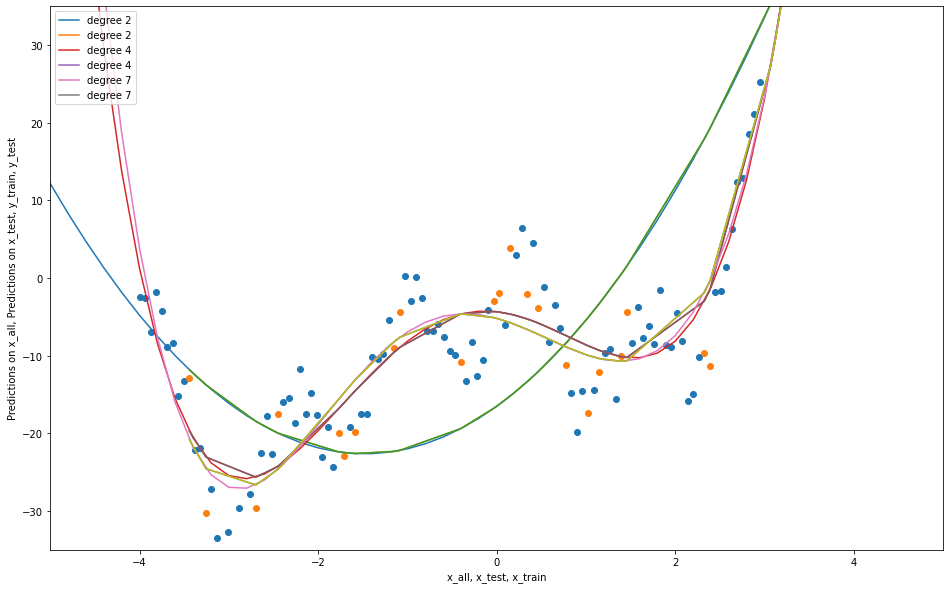

In [368]:
# Fit the different polynomials to the training data and make the plots 
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

**Best Model**

The 4 degree polynomial model seems to be the best fit for the data. This is because the train MSE and test MSE for this model appear to be the best and closest in value. The second degree model is underfitting the data with a very high train/test MSE, while the 7 degree model is overfitting the data with a higher difference in train and test MSE. Additionally, it is visible that as we change the sample size of the training data, the 2 degree and 7 degree model MSEs have greater difference and fluctuation in both the train and test MSEs, whereas that for the 4 degree model remains relatively constant. This denotes that the 4 degree model can be scaled effectively with variations in sample size.

The 2 degree model has a higher bias and a much lower variance, which is visible from the plot of predicted y against x data. Therefore, it is not a good approximation of the true data points. The 7 degree model has a much lower bias but a significant variation as it tries to account for most outliers in the dataset. This makes it incredibly susceptible to noise and is an overrepresantion of the training dataset. This is why, despite having a low train MSE, it has a higher test MSE.

20% data
Degree 2 test mse = 402.323
Degree 2 train mse = 161.171
Degree 4 test mse = 38.341
Degree 4 train mse = 35.115
Degree 7 test mse = 135.208
Degree 7 train mse = 22.544


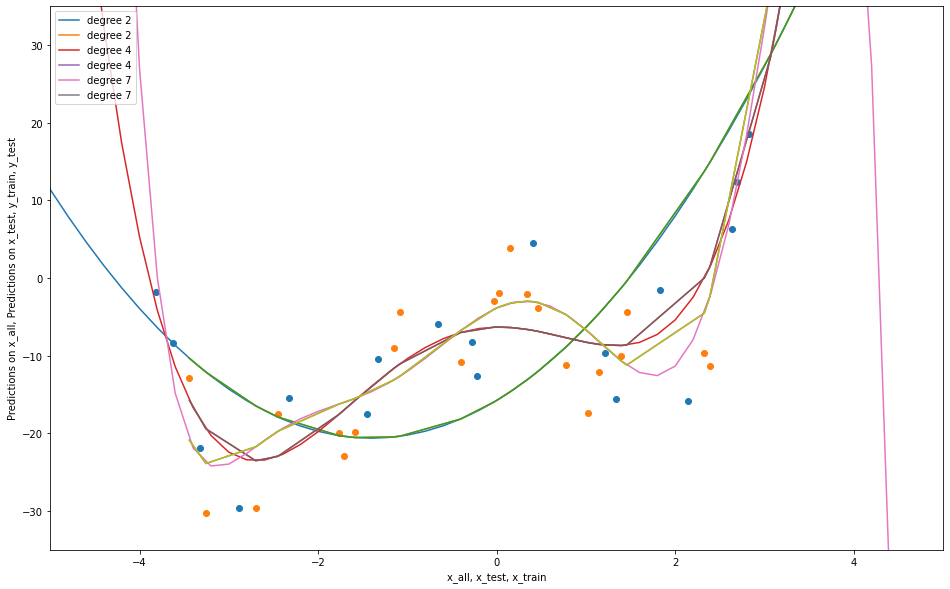

40% data
Degree 2 test mse = 405.805
Degree 2 train mse = 150.333
Degree 4 test mse = 33.164
Degree 4 train mse = 31.625
Degree 7 test mse = 61.237
Degree 7 train mse = 25.493


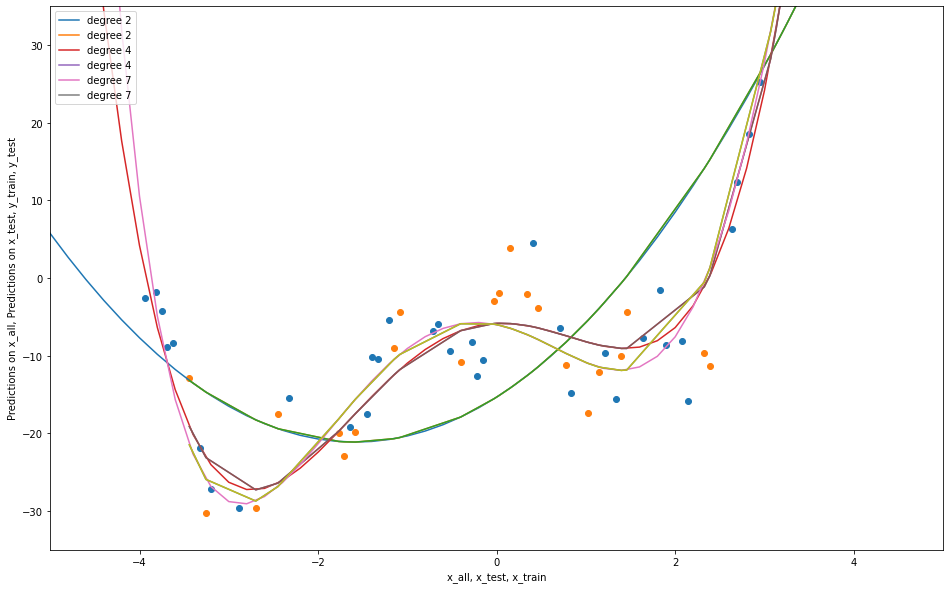

60% data
Degree 2 test mse = 403.251
Degree 2 train mse = 150.084
Degree 4 test mse = 31.781
Degree 4 train mse = 29.193
Degree 7 test mse = 60.167
Degree 7 train mse = 26.099


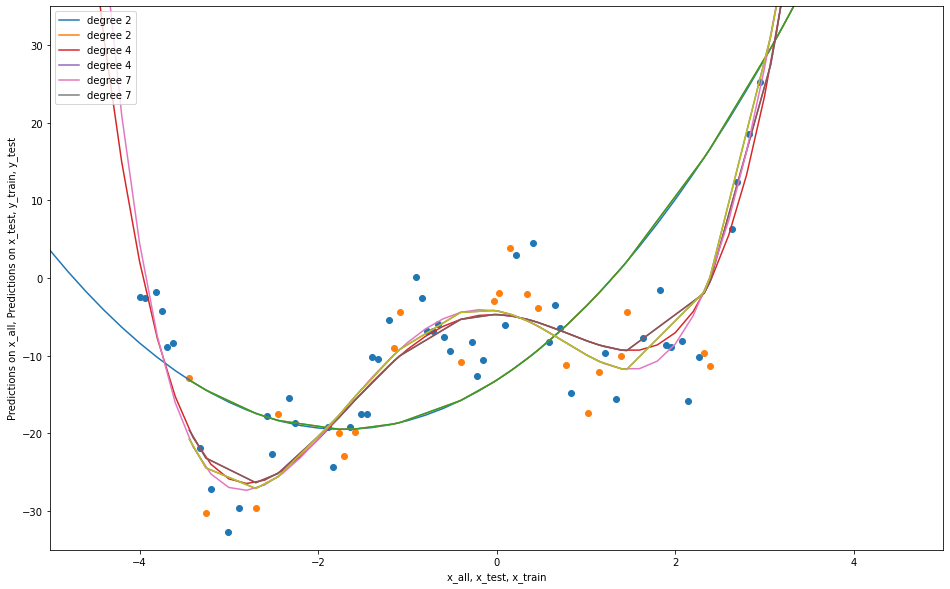

80% data
Degree 2 test mse = 407.594
Degree 2 train mse = 168.119
Degree 4 test mse = 32.518
Degree 4 train mse = 29.305
Degree 7 test mse = 48.077
Degree 7 train mse = 26.549


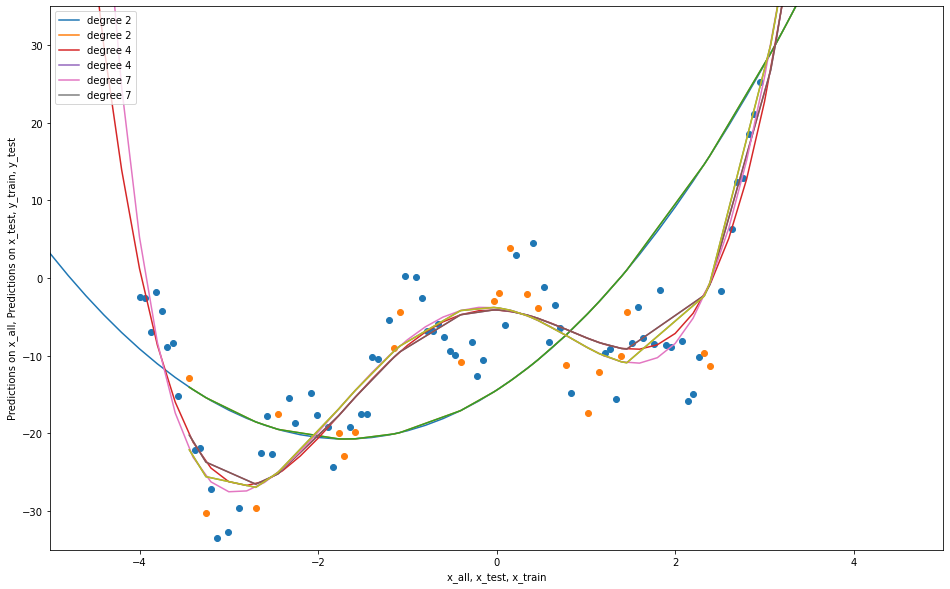

100% data
Degree 2 test mse = 320.064
Degree 2 train mse = 247.297
Degree 4 test mse = 31.292
Degree 4 train mse = 31.720
Degree 7 test mse = 33.411
Degree 7 train mse = 30.677


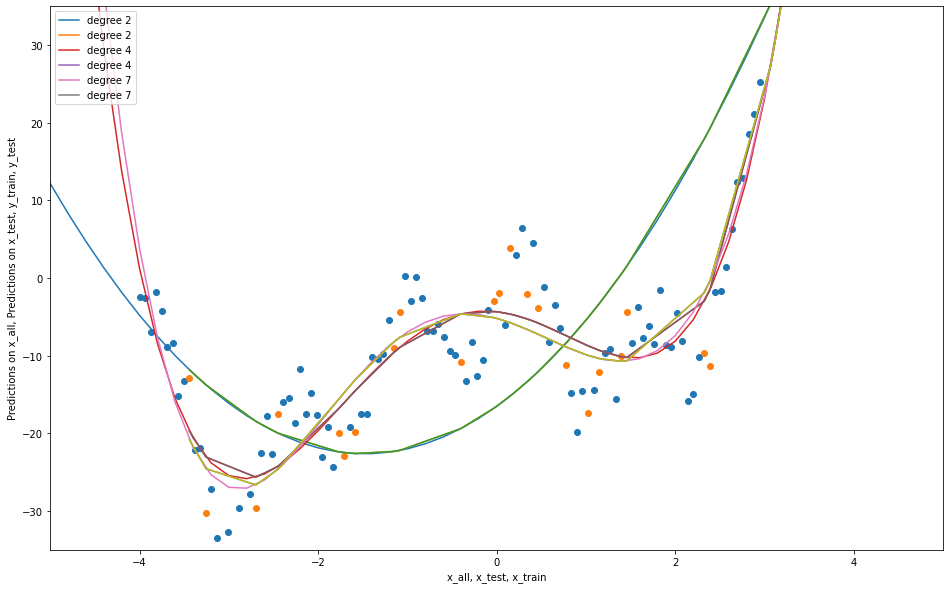

In [369]:
# Study the effects of the training data size on the bias and variance
print("20% data")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test)
print("40% data")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test)
print("60% data")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test)
print("80% data")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test)
print("100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

In [348]:
def plot_curves_2(x_train, y_train, x_test, y_test):
    degs = [2, 4, 7]
    tr_list=[]
    ts_list=[]
    for deg in degs:
        y_fit = lrp.fit(np.vander(np.squeeze(x_train), deg+1), y_train)
        y_pred_test = lrp.predict(np.vander(np.squeeze(x_test), deg+1))
        y_all = lrp.predict(np.vander(np.squeeze(x_all), deg+1))
        mse_test = mean_squared_error(y_test, y_pred_test)
        y_pred_train = lrp.predict(np.vander(np.squeeze(x_train), deg+1))
        mse_train = mean_squared_error(y_train, y_pred_train)
        tr_list.append(mse_train)
        ts_list.append(mse_test)
    return tr_list,ts_list

In [349]:
ls = []
for i in range(10,50,10):
        ls.append(plot_curves_2(x_train[50-i:50+i], y_train[50-i:50+i], x_test, y_test))
ls.append(plot_curves_2(x_train, y_train, x_test, y_test))

In [350]:
log_MSE=[]
for i in range(len(ls)):
    ls[i] = list(ls[i])
    for j in ls[i]:
        log_MSE.append(list(np.log(j)))

data_size = [20,40,60,80,100]

log_MSE_2=[]
for i in range(len(log_MSE)):
    if i%2 == 0:
        log_MSE_2.append(log_MSE[i]+log_MSE[i+1])

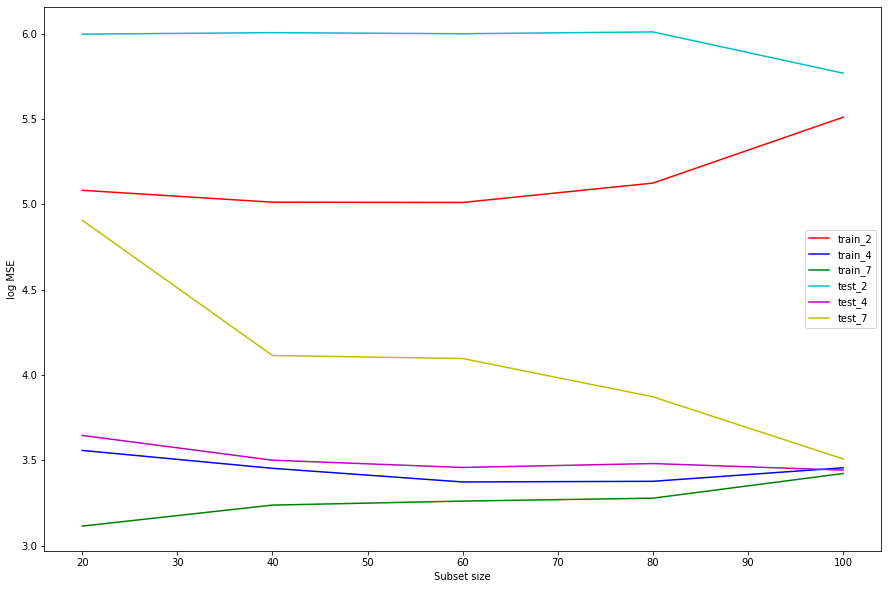

In [352]:
plt.figure(figsize = (15,10))
c = ['train_2','train_4','train_7','test_2','test_4','test_7']
df = pd.DataFrame(log_MSE_2,columns=c)
df['Size'] = data_size
colors=['r','b','g','c','m','y']
for i in range(len(c)):
    plt.plot(df['Size'],df[c[i]],colors[i])
plt.legend(c)
plt.xlabel('Subset size')
plt.ylabel('log MSE')
plt.show()

The train MSEs are increasing as the subset size increases. This is because an increase in data points within the same range are having their MSEs added to the final MSE beyond 80%. This means that the model fits well using upto 80% of the total data, beyond which we get diminishing returns. This is a characteristic of this particular dataset.

## Answer:

# Question 3: Gradient descent (5 pts)

a) (**2 pts**) Compare gradient descent and stochastic gradient descent in terms of their key advantages and disdvantages. Limit your answer to one paragaraph.

b) (**3 pts**) Read this [blog](https://www.benfrederickson.com/numerical-optimization/) on second order optimization and answer the following question: **How does Nelder-Mead method work? What can be the major problems of Nelder-Mead method?**

## Answer:

Part a:

The gradient descent, also known as the batch gradient descent is an optimization algorithm which involves using the entire training set to compute the gradient to find the optimal solution. The movement towards the optimal solution, which could be the local or global optimal solution, is always direct. Stochastic Gradient Descent is a variant of the optimization algorithm in which the dataset is shuffled and partitioned into m examples. This way algorithm can then randomly pick each example of the dataset per iteration (as opposed to going through the entire dataset at once). For Batch Gradient Descent, the trajectory towards the global minimum is always straightforward and it is guaranteed to converge. However, the key disadvantage is that it takes much longer as it runs through the entire dataset and is therefore computationally more expensive. SGD is computationally less expensive, and the randomization helps avoid cycles and repeat examples. However, the key disadvantage for SGD is that there is larger variance because it works with one example per iteration.

Part b:

Nelder–Mead alogirthm is a direct search method that optimizes the response function by comparing function values. It's method changes the step size of a model by taking into account the loss of a new point. If said point is optimal compared to other points, the model will continue growing in step size and head toward the minimal point. If a point along the way is less optimal than a previous point, the model will lower the step and approach the minimal point. The major problems of Nelder-Mead is that with higher dimensional functions, the model will perform poorly. As the parameter amounts grow beyond a dozen, the model will begin to fail. Further, as the amount of dimensions grow, the model will struggle in determining the direction to approach when determining the minimal point.

# Question 4: Stochastic gradient descent (10 pts)

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：
$$ y = w_0 + w_1x_1 + w_2 x_1x_2 + w_3e^{-x_1} $$ 

## Answer:

Let us take the equation:

$$ y = w_0 + w_1x_1 + w_2 x_1x_2 + w_3e^{-x_1} $$ 

To test the model, we compare the predicted output $ \hat{y} $ with the observed y usinig the loss function L. This loss function is the square of the error at that particulare point for SGD. 

$$ L = SSE = (y_{i} - \hat{y}_{i})^2 $$

The goal is to minimize the loss function using Stochastic Gradient Descent Optimization. This is done by iteratively updating the weight coeffiecients. The base equation for this is as follows:

$$ w^{'}_{j} = w_{j} - \eta \frac{\partial L}{\partial w_{j}} $$

For updating the coefficients, we use backpropgation of error. First, we partially differentiate our Loss function with respect to the predicted output.

$$ \frac{\partial L}{\partial \hat{y}} = 2(y_{i} - \hat{y}_{i}) $$

Now, we partially differentiate our Loss function with respect to each coefficient. Using the chain rule of differentiation, we get:

$$ \frac{\partial L}{\partial w_{j}} = \frac{\partial L}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial w_{j}} $$

Therefore:

$$ \frac{\partial L}{\partial w_0} = -2(y_{i} - (\hat{w}_0 + \hat{w}_1x_1 + \hat{w}_2 x_1x_2 + \hat{w}_3e^{-x_1})) = 2 (\hat{y}_{i} - y_{i}) $$

$$ \frac{\partial L}{\partial w_1} = -2x_{1}(y_{i} - (\hat{w}_0 + \hat{w}_1x_1 + \hat{w}_2 x_1x_2 + \hat{w}_3e^{-x_1})) = 2x_{1}(\hat{y}_{i} - y_{i}) $$

$$ \frac{\partial L}{\partial w_2} = -2x_{1}x_{2}(y_{i} - (\hat{w}_0 + \hat{w}_1x_1 + \hat{w}_2 x_1x_2 + \hat{w}_3e^{-x_1})) = 2x_{1}x_{2}(\hat{y}_{i} - y_{i}) $$

$$ \frac{\partial L}{\partial w_3} = -2e^{-x_1}(y_{i} - (\hat{w}_0 + \hat{w}_1x_1 + \hat{w}_2 x_1x_2 + \hat{w}_3e^{-x_1})) = 2e^{-x_1}(\hat{y}_{i} - y_{i}) $$

Therefore, the updated coefficients are:

$$ w_{0}^{'} = w_{0} - \eta \frac{\partial L}{\partial w_{0}} = w_{0} - 2\eta(\hat{y}_{i} - y_{i})$$

$$ w_{1}^{'} = w_{1} - \eta \frac{\partial L}{\partial w_{1}} = w_{1} - 2\eta x_{1} (\hat{y}_{i} - y_{i}) $$

$$ w_{2}^{'} = w_{2} - \eta \frac{\partial L}{\partial w_{2}} = w_{2} - 2\eta x_{1}x_{2} (\hat{y}_{i} - y_{i}) $$

$$ w_{3}^{'} = w_{3} - \eta \frac{\partial L}{\partial w_{3}} = w_{3} - 2\eta e^{-x_1} (\hat{y}_{i} - y_{i}) $$

In the case of Ridge Regularization, the Loss Function $E$ becomes the following.

$$ L = (y_{i} - \hat{y}_{i})^2 + \lambda \sum \limits _{j=1} ^{p} w _{j} ^{2} = [y_{i} - (\hat{w}_0 + \hat{w}_1x_1 + \hat{w}_2 x_1x_2 + \hat{w}_3e^{-x_1})]^2 + \lambda (w_0^2 + w_1^2 + w_2^2 + w_3^2) $$

The Updated Coefficients are now the following.

$$ w_{0}^{'} = w_{0} - \eta \frac{\partial L}{\partial w_{0}} = w_{0} - \eta (2 (\hat{y}_{i} - y_{i}) + 2 \lambda w_0) $$

$$ w_{1}^{'} = w_{1} - \eta \frac{\partial L}{\partial w_{1}} = w_{1} - \eta (2 x_{1} (\hat{y}_{i} - y_{i}) + 2 \lambda w_1) $$

$$ w_{2}^{'} = w_{2} - \eta \frac{\partial L}{\partial w_{2}} = w_{2} - \eta (2 x_{1}x_{2}(\hat{y}_{i} - y_{i}) + 2 \lambda w_2) $$

$$ w_{3}^{'} = w_{3} - \eta \frac{\partial L}{\partial w_{3}} = w_{3} - \eta (2 e^{-x_1} (\hat{y}_{i} - y_{i}) + 2 \lambda w_3) $$

The above coefficient updates in the case of ridge regularization are what we use when coding Stochastic Gradient Descent below.

# Question 5: Stochastic gradient descent coding (20 pts)

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

a) (**15 pts**) Use your new gradient descent regression to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [ ]:
# # Only use this code block if you are using Google Colab.
# # If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
# from google.colab import files

# ## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
# ## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
# uploaded = files.upload()

## Answer:

In [353]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import math

In [354]:
class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.coef = np.zeros(4)
        
    def sgd(self, gradient):
        self.coef = self.coef - (self.learning_rate*gradient)
    
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        self.cache = np.zeros(self.coef.shape)
        self.v = np.zeros(self.coef.shape)
        self.decay_rate = 0.9
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                X_i = X[i,:]
                
                error_i = self.linearPredict(X_i) - y[i]
                
                gradient = np.array([2*error_i*X_i[0] + 2*self.regularization*self.coef[0],
                                     2*error_i*X_i[1] + 2*self.regularization*self.coef[1],
                                     2*error_i*X_i[2] + 2*self.regularization*self.coef[2],
                                     2*error_i*X_i[3] + 2*self.regularization*self.coef[3]])
                                        
               
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):  
        return X.dot(self.coef)     

In [355]:
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

Combos are displayed in the following format: (learning rate, regularization).
The first combo is (0.01, 0)
The second combo is (0.001, 0)
Their MSE scores are [0.027444548002430152, 0.02884216736225418]


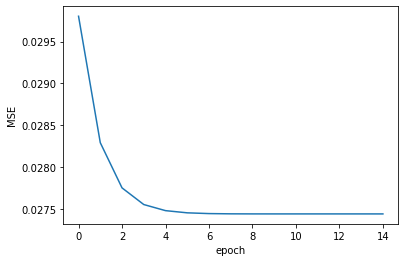

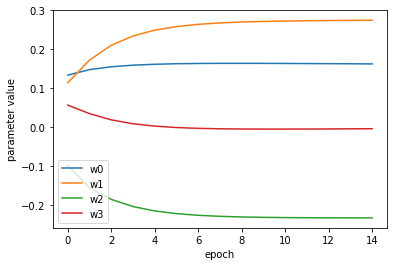

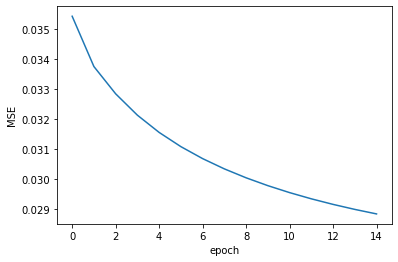

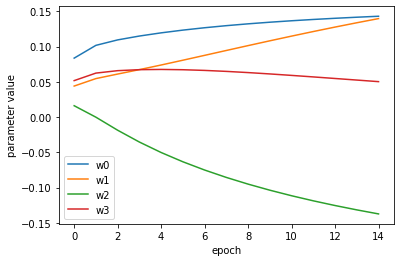

In [356]:
#Make a list of arrays for the learning rates and the regularization rates
combo_list = []
for lr in range(0, len(learning_rate)):
    for reg in range(0, len(regularization)):
        combo_list.append((learning_rate[lr], regularization[reg]))
#Make an empty list for the lowest mse scores.
lowest_mse_scores = []

#Iterate over the list of arrays to find lowest mse.
for i in range(0, len(combo_list)):
    sgd = Regression(combo_list[i][0], combo_list[i][1], n_epochs)
    sgd.fit(X,y,plot=False)
    lowest_mse_scores.append(sgd.lowest_mse)

#Show the best combo
chosen_combo_list = np.argsort(np.array(lowest_mse_scores))[:2]
print("Combos are displayed in the following format: (learning rate, regularization).")
print('The first combo is', combo_list[chosen_combo_list[0]])
print('The second combo is', combo_list[chosen_combo_list[1]])
lowest_mse_scores = []
#Iterate over the duo to put in the parameters to get the lowest mse score for each of them.
for i in chosen_combo_list:
    sgd = Regression(combo_list[i][0], combo_list[i][1], n_epochs)
    sgd.fit(X,y,plot=True)
    lowest_mse_scores.append(sgd.lowest_mse)
print('Their MSE scores are', lowest_mse_scores)